In [1]:
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Another utility for the legend
from matplotlib.cm import ScalarMappable


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/trentino_temperature.csv")


In [3]:
data

,stationid,date,hour,temp,flag
0,T0001,2004/01/01,0,-1.7,1
1,T0001,2004/01/01,1,-1.8,1
2,T0001,2004/01/01,2,-1.8,1
3,T0001,2004/01/01,3,-2.2,1
4,T0001,2004/01/01,4,-3.2,1
...,...,...,...,...,...
17539,T0001,2005/12/31,19,-3.4,1
17540,T0001,2005/12/31,20,-3.3,1
17541,T0001,2005/12/31,21,-3.3,1
17542,T0001,2005/12/31,22,-3.3,1


In [4]:
data["date"] = pd.to_datetime(data["date"])

In [5]:
data

,stationid,date,hour,temp,flag
0,T0001,2004-01-01,0,-1.7,1
1,T0001,2004-01-01,1,-1.8,1
2,T0001,2004-01-01,2,-1.8,1
3,T0001,2004-01-01,3,-2.2,1
4,T0001,2004-01-01,4,-3.2,1
...,...,...,...,...,...
17539,T0001,2005-12-31,19,-3.4,1
17540,T0001,2005-12-31,20,-3.3,1
17541,T0001,2005-12-31,21,-3.3,1
17542,T0001,2005-12-31,22,-3.3,1


In [7]:
type(data["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
# Subset data

subset = data[(data["date"].dt.year == 2004) & (data["date"].dt.month == 1)]

In [12]:
# Extract hour, day, and temperature
hour = subset["hour"]
day = subset["date"].dt.day
temp = subset["temp"]

In [28]:
temp = temp.values.reshape(24, len(day.unique()), order="F")

In [30]:
# Compute x and y grids, passed to `ax.pcolormesh()`.

# The first + 1 increases the length
# The outer + 1 ensures days start at 1, and not at 0.
xgrid = np.arange(day.max() + 1) + 1

# Hours start at 0, length 2
ygrid = np.arange(25)

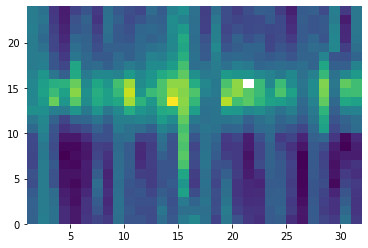

In [40]:
fig, ax = plt.subplots()
ax.pcolormesh(xgrid, ygrid, temp)
ax.set_frame_on(False) # remove all spines

### A layout of heatmaps

In [41]:
MIN_TEMP = data["temp"].min()
MAX_TEMP = data["temp"].max()

In [67]:
def single_plot(data, month, year, ax):
    data = data[(data["date"].dt.year == year) & (data["date"].dt.month == month)]

    hour = data["hour"]
    day = data["date"].dt.day
    temp = data["temp"]
    temp = temp.values.reshape(24, len(day.unique()), order="F")
    
    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(25)
    
    ax.pcolormesh(xgrid, ygrid, temp, cmap="magma", vmin=MIN_TEMP, vmax=MAX_TEMP)
    # Invert the vertical axis
    ax.set_ylim(24, 0)
    # Set tick positions for both axes
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([10, 20, 30])
    # Remove ticks by setting their length to 0
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # Remove all spines
    ax.set_frame_on(False)

Text(0.5, 0.95, 'Hourly temperatures - Station T0001')

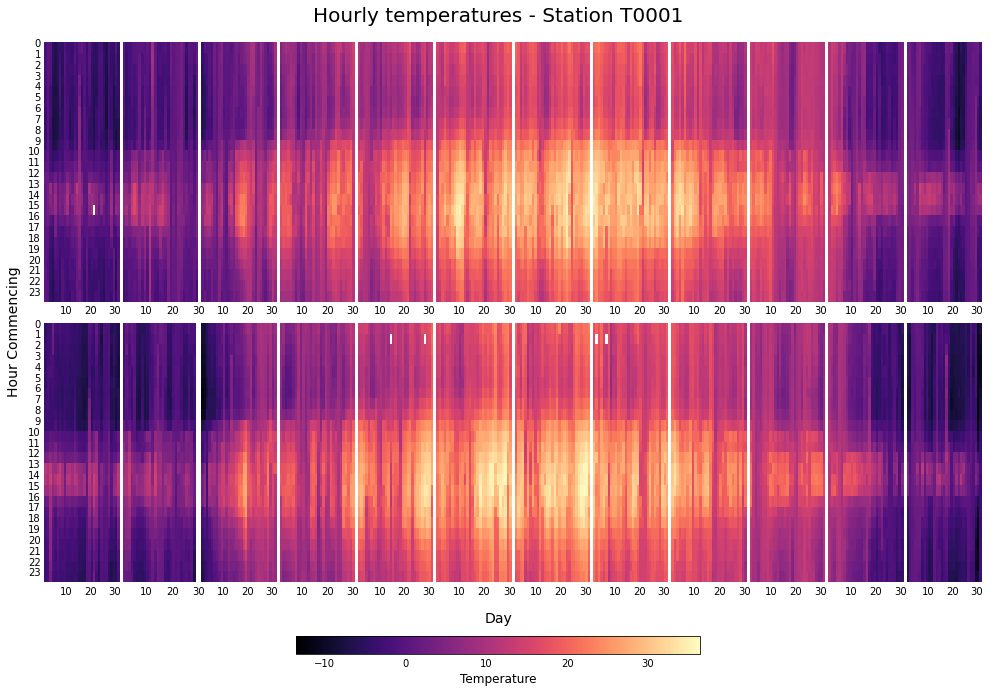

In [83]:
# create a figure with 2 rows and 12 columns and loop through each month

fig, axes = plt.subplots(2, 12, figsize=(14, 10), sharey=True)

for i, year in enumerate([2004, 2005]):
    for j, month in enumerate(range(1, 13)):
        single_plot(data, month, year, axes[i, j])

# Adjust margin and space between subplots
# Extra space is on the left to add a label
fig.subplots_adjust(left=0.05, right=0.98, top=0.9, hspace=0.08, wspace=0.04)


# Add legend 

# First, let's make some room for the legend in the bottom.
fig.subplots_adjust(bottom=0.15)

# Create a new axis to contain the color bar
# Values are: (x coordinate of left border, y coordinate for bottom border, width, height)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.025])

# Create a normalizer that goes from minimum to maximum temperature
norm = mc.Normalize(MIN_TEMP, MAX_TEMP)

# Create the colorbar and set it to horizontal
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="magma"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal")

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label
cb.set_label("Temperature", size=12)


# add some labels and title

fig.text(0.5, 0.1, "Day", ha="center", va="center", fontsize=14)
fig.text(0.02, 0.5, 'Hour Commencing', ha="center", va="center", rotation="vertical", fontsize=14)
fig.suptitle("Hourly temperatures - Station T0001", fontsize=20, y=0.95)

In [86]:
# save the plot
#fig.set_facecolor("white")
#fig.savefig("plot.png", dpi=300)